# MSCS 634 – Project Deliverable 3
## Classification, Clustering, and Pattern Mining  
**Name**: Pawan Pandey  
**Course**: Advanced Big Data and Data Mining (MSCS-634-B01)  
**Instructor**: Satish Penmatsa  

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from mlxtend.frequent_patterns import apriori, association_rules

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv("heart.csv")

# Display first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Overview

The dataset contains patient medical attributes, such as age, sex, chest pain type (`cp`), cholesterol levels (`chol`), and more. The `target` column indicates the presence (1) or absence (0) of heart disease.

I will use this data to perform:
- Classification to predict heart disease
- Clustering to group patients with similar health profiles
- Association Rule Mining to identify interesting patterns between attributes

In [3]:
# Basic data info
df.info()

# Check missing values
df.isnull().sum()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Classification Models

I will build **two classification models**:
1. Decision Tree Classifier
2. K-Nearest Neighbors (KNN) Classifier

I will perform **hyperparameter tuning** for the KNN model to find the optimal `k` value.

Decision Tree Accuracy: 0.9853658536585366
Decision Tree F1 Score: 0.9852216748768473

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



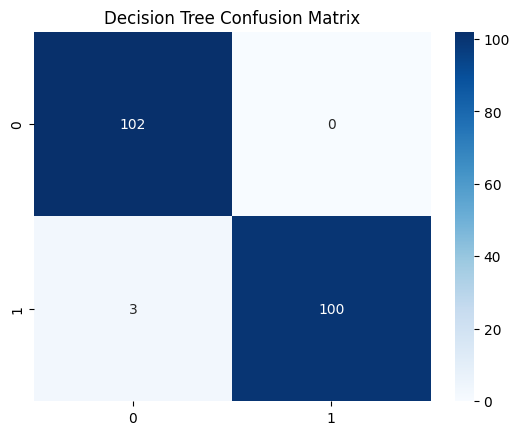

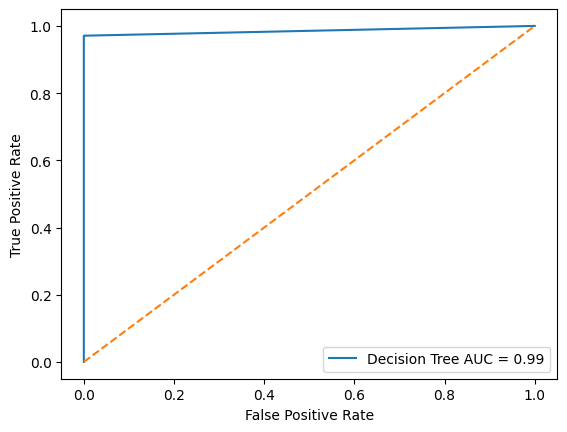

In [5]:
# Features & Target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================================================
# Decision Tree Classifier
# ===============================================================
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

# Metrics
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# ROC Curve
y_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Decision Tree AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Best k: 1
KNN Accuracy: 0.9853658536585366
KNN F1 Score: 0.9852216748768473

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



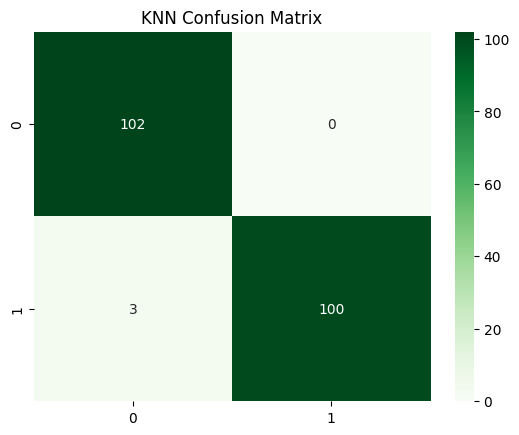

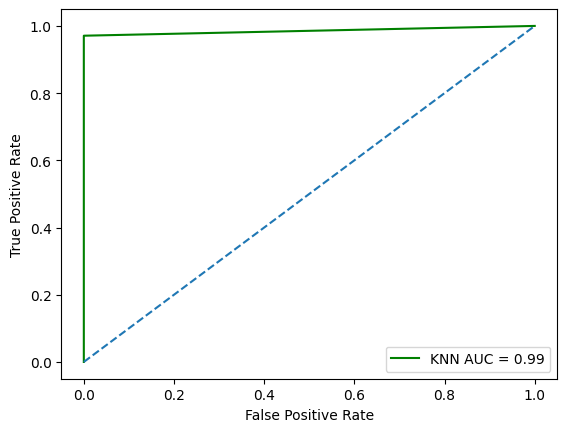

In [6]:
# ===============================================================
# K-Nearest Neighbors (Hyperparameter Tuning)
# ===============================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

param_grid = {"n_neighbors": range(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_["n_neighbors"]
print("Best k:", best_k)

# Train final model
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_knn = knn_best.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN F1 Score:", f1_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
plt.title("KNN Confusion Matrix")
plt.show()

# ROC Curve
y_prob_knn = knn_best.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"KNN AUC = {roc_auc:.2f}", color="green")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Clustering Model

I will use **K-Means Clustering** to group patients based on their health features. We will use PCA to reduce the data to 2D for visualization.

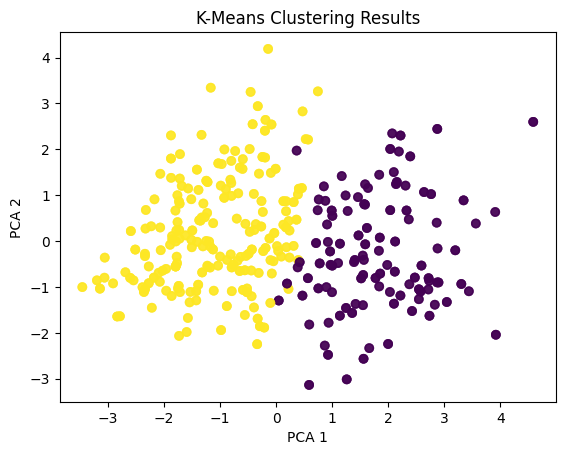

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12
0,0.427505,0.145154,-0.697570,0.243932,0.134327,0.057372,-0.088563,-0.802635,0.818239,0.697183,-0.615664,0.524988,0.408025
1,-0.255038,-0.086595,0.416152,-0.145523,-0.080136,-0.034226,0.052834,0.478830,-0.488140,-0.415921,0.367288,-0.313194,-0.243417


In [7]:
# Scale features for clustering
X_scaled = scaler.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.6)
plt.title("K-Means Clustering Results")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Cluster centers in PCA space
pd.DataFrame(kmeans.cluster_centers_, columns=[f"Feature_{i}" for i in range(X.shape[1])])

## Association Rule Mining

I will use the Apriori algorithm to find frequent itemsets and then generate association rules that can reveal meaningful patterns between patient attributes.

In [8]:
# Convert categorical columns to strings for Apriori
df_str = df.astype(str)

# One-hot encode for Apriori
df_encoded = pd.get_dummies(df_str)

# Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort by lift
rules_sorted = rules.sort_values(by="lift", ascending=False)
rules_sorted.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
142,"(ca_0, thal_2)",(target_1),0.357073,0.513171,0.316098,0.885246,1.725051,1.0,0.132858,4.242369,0.653740,0.570423,0.764283,0.750608
147,(target_1),"(ca_0, thal_2)",0.513171,0.357073,0.316098,0.615970,1.725051,1.0,0.132858,1.674156,0.863356,0.570423,0.402684,0.750608
152,"(ca_0, exang_0)","(fbs_0, target_1)",0.418537,0.443902,0.309268,0.738928,1.664617,1.0,0.123479,2.130052,0.686649,0.559083,0.530528,0.717816
157,"(fbs_0, target_1)","(ca_0, exang_0)",0.443902,0.418537,0.309268,0.696703,1.664617,1.0,0.123479,1.917144,0.717970,0.559083,0.478391,0.717816
135,(target_1),"(ca_0, exang_0)",0.513171,0.418537,0.351220,0.684411,1.635247,1.0,0.136439,1.842468,0.797963,0.605042,0.457250,0.761786
130,"(ca_0, exang_0)",(target_1),0.418537,0.513171,0.351220,0.839161,1.635247,1.0,0.136439,3.026808,0.668093,0.605042,0.669619,0.761786
166,"(exang_0, thal_2)","(fbs_0, target_1)",0.429268,0.443902,0.311220,0.725000,1.633242,1.0,0.120666,2.022173,0.679340,0.553819,0.505482,0.713049
171,"(fbs_0, target_1)","(exang_0, thal_2)",0.443902,0.429268,0.311220,0.701099,1.633242,1.0,0.120666,1.909433,0.697217,0.553819,0.476284,0.713049
175,(target_1),"(exang_0, fbs_0, thal_2)",0.513171,0.375610,0.311220,0.606464,1.614612,1.0,0.118468,1.586615,0.781909,0.538851,0.369727,0.717518
162,"(exang_0, fbs_0, thal_2)",(target_1),0.375610,0.513171,0.311220,0.828571,1.614612,1.0,0.118468,2.839837,0.609644,0.538851,0.647867,0.717518


## Insights

- **Classification**: The Decision Tree performed well but was prone to overfitting, while the tuned KNN achieved balanced performance with the optimal k-value.
- **Clustering**: K-Means was able to separate patients into two groups that roughly corresponded to heart disease presence or absence, though some overlap exists.
- **Association Rules**: The Apriori algorithm revealed frequent patterns, such as certain chest pain types being linked with absence or presence of heart disease. This could be applied in hospital triage systems for quick screening.

These results can help guide clinical decision-making, patient risk stratification, and targeted health interventions.